In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
#Get the bin information and celel count
cell_counts = pd.read_csv('Bin_info/cell_counts_20200303.csv',index_col='Bin')
#Six concentration of cerulenin was evaluated
libs = ['0A','0B','1A','1B','2A','2B','3A','3B','5A','5B','8A','8B']
cerulenin = [0,1,2,3,5,8]
cells_ratio = pd.DataFrame(index = cell_counts.index)
for lib in libs:
    cells_ratio['Lib_'+lib] = cell_counts[['Lib_'+lib]].apply(lambda x: x/(np.sum(x)))

In [2]:
#Overview of the distribution of cell in each 
cells_ratio

,Lib_0A,Lib_0B,Lib_1A,Lib_1B,Lib_2A,Lib_2B,Lib_3A,Lib_3B,Lib_5A,Lib_5B,Lib_8A,Lib_8B
Bin,,,,,,,,,,,,
P2,0.021369,0.021831,0.029676,0.026098,0.036124,0.033210,0.038979,0.037350,0.045235,0.038665,0.046108,0.040176
P3,0.052950,0.054708,0.074376,0.070007,0.080881,0.079604,0.081926,0.083375,0.083344,0.082649,0.082986,0.082634
P4,0.106758,0.109241,0.112800,0.111114,0.111591,0.111302,0.114111,0.109900,0.111439,0.108736,0.109782,0.108085
P5,0.113000,0.112672,0.117503,0.114655,0.114865,0.112912,0.116420,0.109857,0.111215,0.108376,0.110828,0.107330
P6,0.100831,0.098665,0.093501,0.091144,0.095694,0.094348,0.101300,0.098059,0.115573,0.108116,0.119062,0.111879
P7,0.089865,0.088864,0.112967,0.106428,0.135327,0.129793,0.142559,0.147728,0.167697,0.163994,0.170269,0.166815
P8,0.215059,0.230095,0.216933,0.223217,0.209483,0.210593,0.201112,0.207579,0.187574,0.197961,0.184259,0.195974
P9,0.300167,0.283925,0.242244,0.257337,0.216035,0.228239,0.203593,0.206152,0.177922,0.191503,0.176706,0.187108


In [3]:
#Get the information of Q2 gate
Q2A = pd.read_csv('Sequence_Result1/FapR_LibQ2A.csv',sep = ',', index_col='Combination')
Q2B = pd.read_csv('Sequence_Result1/FapR_LibQ2B.csv',sep = ',', index_col='Combination')
stat = pd.DataFrame(index = Q2A.index)
stat[['Q2_0A','Q2_1A','Q2_2A','Q2_3A','Q2_5A','Q2_8A']] = Q2A[['P2','P3','P4','P5','P6','P7']]
stat[['Q2_0B','Q2_1B','Q2_2B','Q2_3B','Q2_5B','Q2_8B']] = Q2B[['P2','P3','P4','P5','P6','P7']]
stat['TR_Pro'] = None
stat['Core_pro_design'] = None
stat['1st_UAS'] = None
stat['2nd_UAS'] = None
stat['3rd_UAS'] = None
TR_index = list(stat.columns).index('TR_Pro')
core_index = list(stat.columns).index('Core_pro_design')
first = list(stat.columns).index('1st_UAS')
second = list(stat.columns).index('2nd_UAS')
third = list(stat.columns).index('3rd_UAS')
for k in range(len(stat)):
    stat.iloc[k,TR_index] = stat.index[k].split('-')[0]
    stat.iloc[k,core_index] = stat.index[k].split('-')[1]
    stat.iloc[k,first] = stat.index[k].split('-')[2].split('_')[1][0]
    stat.iloc[k,second] = stat.index[k].split('-')[2].split('_')[1][1]
    stat.iloc[k,third] = stat.index[k].split('-')[2].split('_')[1][2]

In [4]:
#Get the information of bin boundary
Bin_bou_DF_0 = pd.read_csv('Bin_info/bin_boundary_configure_Lib0.csv',index_col='Bin')
Bin_bou_DF_1 = pd.read_csv('Bin_info/bin_boundary_configure_Lib1.csv',index_col='Bin')
Bin_bou_DF_2 = pd.read_csv('Bin_info/bin_boundary_configure_Lib2.csv',index_col='Bin')
Bin_bou_DF_3 = pd.read_csv('Bin_info/bin_boundary_configure_Lib3.csv',index_col='Bin')
Bin_bou_DF_5 = pd.read_csv('Bin_info/bin_boundary_configure_Lib5.csv',index_col='Bin')
Bin_bou_DF_8 = pd.read_csv('Bin_info/bin_boundary_configure_Lib8.csv',index_col='Bin')

Bin_bou_Dic_0 = Bin_bou_DF_0.to_dict()
Bin_bou_Dic_1 = Bin_bou_DF_1.to_dict()
Bin_bou_Dic_2 = Bin_bou_DF_2.to_dict()
Bin_bou_Dic_3 = Bin_bou_DF_3.to_dict()
Bin_bou_Dic_5 = Bin_bou_DF_5.to_dict()
Bin_bou_Dic_8 = Bin_bou_DF_8.to_dict()

exp_Lst = ['R1','R2']
bins_Lst = ['P2','P3','P4','P5','P6','P7','P8','P9']
for exp in exp_Lst:
    for bins in bins_Lst:
        temp = Bin_bou_DF_0.loc[bins,exp].split(',')
        Bin_bou_Dic_0[exp][bins] = [float(temp[0]),float(temp[1])]
        
        temp = Bin_bou_DF_1.loc[bins,exp].split(',')
        Bin_bou_Dic_1[exp][bins] = [float(temp[0]),float(temp[1])]
        
        temp = Bin_bou_DF_2.loc[bins,exp].split(',')
        Bin_bou_Dic_2[exp][bins] = [float(temp[0]),float(temp[1])]
        
        temp = Bin_bou_DF_3.loc[bins,exp].split(',')
        Bin_bou_Dic_3[exp][bins] = [float(temp[0]),float(temp[1])]
        
        temp = Bin_bou_DF_5.loc[bins,exp].split(',')
        Bin_bou_Dic_5[exp][bins] = [float(temp[0]),float(temp[1])]
        
        temp = Bin_bou_DF_8.loc[bins,exp].split(',')
        Bin_bou_Dic_8[exp][bins] = [float(temp[0]),float(temp[1])]
        
Bin_bou_DF_0 = pd.DataFrame(Bin_bou_Dic_0)
Bin_bou_DF_1 = pd.DataFrame(Bin_bou_Dic_1)
Bin_bou_DF_2 = pd.DataFrame(Bin_bou_Dic_2)
Bin_bou_DF_3 = pd.DataFrame(Bin_bou_Dic_3)
Bin_bou_DF_5 = pd.DataFrame(Bin_bou_Dic_5)
Bin_bou_DF_8 = pd.DataFrame(Bin_bou_Dic_8)

ratio_0 = pd.DataFrame(columns=['R1','R2'],index = Bin_bou_DF_0.index)
ratio_1 = pd.DataFrame(columns=['R1','R2'],index = Bin_bou_DF_1.index)
ratio_2 = pd.DataFrame(columns=['R1','R2'],index = Bin_bou_DF_2.index)
ratio_3 = pd.DataFrame(columns=['R1','R2'],index = Bin_bou_DF_3.index)
ratio_5 = pd.DataFrame(columns=['R1','R2'],index = Bin_bou_DF_5.index)
ratio_8 = pd.DataFrame(columns=['R1','R2'],index = Bin_bou_DF_8.index)

for bins in bins_Lst:
    ratio_0['R1'][bins] = (Bin_bou_DF_0['R1'][bins][0]+Bin_bou_DF_0['R1'][bins][1])/2
    ratio_0['R2'][bins] = (Bin_bou_DF_0['R2'][bins][0]+Bin_bou_DF_0['R2'][bins][1])/2
    ratio_1['R1'][bins] = (Bin_bou_DF_1['R1'][bins][0]+Bin_bou_DF_1['R1'][bins][1])/2
    ratio_1['R2'][bins] = (Bin_bou_DF_1['R2'][bins][0]+Bin_bou_DF_1['R2'][bins][1])/2
    ratio_2['R1'][bins] = (Bin_bou_DF_2['R1'][bins][0]+Bin_bou_DF_2['R1'][bins][1])/2
    ratio_2['R2'][bins] = (Bin_bou_DF_2['R2'][bins][0]+Bin_bou_DF_2['R2'][bins][1])/2
    ratio_3['R1'][bins] = (Bin_bou_DF_3['R1'][bins][0]+Bin_bou_DF_3['R1'][bins][1])/2
    ratio_3['R2'][bins] = (Bin_bou_DF_3['R2'][bins][0]+Bin_bou_DF_3['R2'][bins][1])/2
    ratio_5['R1'][bins] = (Bin_bou_DF_5['R1'][bins][0]+Bin_bou_DF_5['R1'][bins][1])/2
    ratio_5['R2'][bins] = (Bin_bou_DF_5['R2'][bins][0]+Bin_bou_DF_5['R2'][bins][1])/2
    ratio_8['R1'][bins] = (Bin_bou_DF_8['R1'][bins][0]+Bin_bou_DF_8['R1'][bins][1])/2
    ratio_8['R2'][bins] = (Bin_bou_DF_8['R2'][bins][0]+Bin_bou_DF_8['R2'][bins][1])/2

In [5]:
ratios = {}
ratios['Lib_0A'] = ratio_0['R1']
ratios['Lib_0B'] = ratio_0['R2']
ratios['Lib_1A'] = ratio_1['R1']
ratios['Lib_1B'] = ratio_1['R2']
ratios['Lib_2A'] = ratio_2['R1']
ratios['Lib_2B'] = ratio_2['R2']
ratios['Lib_3A'] = ratio_3['R1']
ratios['Lib_3B'] = ratio_3['R2']
ratios['Lib_5A'] = ratio_5['R1']
ratios['Lib_5B'] = ratio_5['R2']
ratios['Lib_8A'] = ratio_8['R1']
ratios['Lib_8B'] = ratio_8['R2']

In [6]:
# Two batch of sequece data
FapR_reads1,FapR_reads2,FapR_reads = {},{},{}
for lib in libs:
    file_c1 = 'Sequence_Result1/'+'FapR_Lib'+lib+'.csv'
    file_c2 = 'Sequence_Result2/'+'FapR_Lib'+lib+'.csv'
    FapR_reads1['Lib_'+lib] = pd.read_csv(file_c1,sep = ',', index_col='Combination')
    FapR_reads2['Lib_'+lib] = pd.read_csv(file_c2,sep = ',', index_col='Combination')
    FapR_reads['Lib_'+lib] = FapR_reads1['Lib_'+lib]+FapR_reads2['Lib_'+lib]

In [7]:
#Calculate the miu value of each genotype
norm_bins_Lst = ['norm_P2','norm_P3','norm_P4','norm_P5','norm_P6','norm_P7','norm_P8','norm_P9']
norm2_bins_Lst = ['norm2_P2','norm2_P3','norm2_P4','norm2_P5','norm2_P6','norm2_P7','norm2_P8','norm2_P9'] 
norm3_bins_Lst = ['norm3_P2','norm3_P3','norm3_P4','norm3_P5','norm3_P6','norm3_P7','norm3_P8','norm3_P9']
for lib in libs:
    FapR_reads['Lib_'+lib][norm_bins_Lst] = FapR_reads['Lib_'+lib][bins_Lst].apply(lambda x: (x) / (np.sum(x)))
    for i in range(8):
        FapR_reads['Lib_'+lib]['norm2_'+bins_Lst[i]] = FapR_reads['Lib_'+lib][norm_bins_Lst[i]]*\
                                                       cell_counts['Lib_'+lib][bins_Lst[i]]
    FapR_reads['Lib_'+lib][norm3_bins_Lst] = FapR_reads['Lib_'+lib][norm2_bins_Lst].\
                                                apply(lambda x: x/(np.sum(x)), axis=1)
    FapR_reads['Lib_'+lib]['reads_sum'] = FapR_reads['Lib_'+lib][bins_Lst].apply(lambda x: np.sum(x), axis=1)
    FapR_reads['Lib_'+lib]['mean_value'] = np.dot(FapR_reads['Lib_'+lib][norm3_bins_Lst],ratios['Lib_'+lib])
    print('Lib_'+lib)

Lib_0A
Lib_0B
Lib_1A
Lib_1B
Lib_2A
Lib_2B
Lib_3A
Lib_3B
Lib_5A
Lib_5B
Lib_8A
Lib_8B


In [8]:
#Calculate of the average miu of duplicate
for lib in libs:
    stat['miu_Lib_'+lib] = FapR_reads['Lib_'+lib]['mean_value']
    stat['reads_sum_'+lib] = FapR_reads['Lib_'+lib]['reads_sum']
stat['miu_Lib_0'] = (stat['miu_Lib_0A']+stat['miu_Lib_0B'])/2
stat['miu_Lib_1'] = (stat['miu_Lib_1A']+stat['miu_Lib_1B'])/2
stat['miu_Lib_2'] = (stat['miu_Lib_2A']+stat['miu_Lib_2B'])/2
stat['miu_Lib_3'] = (stat['miu_Lib_3A']+stat['miu_Lib_3B'])/2
stat['miu_Lib_5'] = (stat['miu_Lib_5A']+stat['miu_Lib_5B'])/2
stat['miu_Lib_8'] = (stat['miu_Lib_8A']+stat['miu_Lib_8B'])/2

In [9]:
#Thresholds evaluation
thresholds = [100,250,500,1000]
stat_thr = {}
view_thr = {}
for threshold in thresholds:
    stat_thr['Threshold'+str(threshold)] = stat[(stat['reads_sum_0A']>threshold) & (stat['reads_sum_0B']>threshold) & \
                                                (stat['reads_sum_1A']>threshold) & (stat['reads_sum_1B']>threshold) & \
                                                (stat['reads_sum_2A']>threshold) & (stat['reads_sum_2B']>threshold) & \
                                                (stat['reads_sum_3A']>threshold) & (stat['reads_sum_3B']>threshold) & \
                                                (stat['reads_sum_5A']>threshold) & (stat['reads_sum_5B']>threshold) & \
                                                (stat['reads_sum_8A']>threshold) & (stat['reads_sum_8B']>threshold) ].copy()
    stat_thr['Threshold'+str(threshold)].to_csv('ExportResults/stat_%s.csv'%(threshold))
    view_thr['Threshold'+str(threshold)]=pd.read_csv('ExportResults/stat_%s.csv'%(threshold),index_col='Combination')

In [10]:
for threshold in thresholds:
    print('With reads threshold: %d'%(threshold))
    print(len(view_thr['Threshold'+str(threshold)]))

With reads threshold: 100
3041
With reads threshold: 250
2632
With reads threshold: 500
2373
With reads threshold: 1000
2078


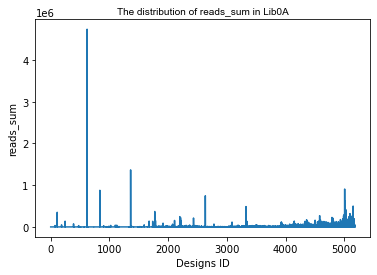

In [11]:
plt.plot(stat['reads_sum_0A'].values)
plt.title('The distribution of reads_sum in Lib0A', fontproperties = 'Arial')
plt.xlabel('Designs ID')
plt.ylabel('reads_sum')
plt.savefig('ExportResults/reads_sum_0A.png',dpi = 500)
plt.show()

In [12]:
#The total reads in bin P2 to P9>250
view = view_thr['Threshold250'].copy()
Pros = ['pGPD','pENO2','pHSP12','pEXG1','pCYC1','pULI1']
OPs = ['TATA_OP','OP_TATA','OP_TATA_OP','N30_OP']
combi_num = {}
for Pro in Pros:
    combi_num[Pro] = {}
    for OP in OPs:
        combi_num[Pro][OP] = len(view[(view['TR_Pro']==Pro) & (view['Core_pro_design']==OP)] )
combi_num_df = pd.DataFrame.from_dict(combi_num)

In [13]:
combi_num_df

,pGPD,pENO2,pHSP12,pEXG1,pCYC1,pULI1
TATA_OP,11,60,148,137,143,140
OP_TATA,43,73,147,140,158,157
OP_TATA_OP,13,38,146,133,146,138
N30_OP,13,48,135,153,162,150


In [14]:
#Analyze the distribution of genotype
def gini_coef(wealths):
    cum_wealths = np.cumsum(sorted(np.append(wealths, 0)))
    sum_wealths = cum_wealths[-1]
    xarray = np.array(range(0, len(cum_wealths))) / np.float(len(cum_wealths)-1)
    yarray = cum_wealths / sum_wealths
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    return A / (A+B)
combi_gini = {}
combi_gini['Pro'] = {}
for OP in OPs:
    combi_gini[OP] = {}
    for Pro in Pros:
        combi_gini['Pro'][Pro] = gini_coef(stat[(stat['TR_Pro']==Pro)]['reads_sum_0A'].values )
        combi_gini[OP][Pro] = gini_coef(stat[(stat['TR_Pro']==Pro) & \
                                             (stat['Core_pro_design']==OP)]['reads_sum_0A'].values )
combi_gini_df = pd.DataFrame.from_dict(combi_gini)

In [15]:
combi_gini_pro = {}
for Pro in Pros:
    combi_gini_pro[Pro] = gini_coef(stat[(stat['TR_Pro']==Pro)]['reads_sum_0A'].values )

In [16]:
combi_gini_df

,Pro,TATA_OP,OP_TATA,OP_TATA_OP,N30_OP
pGPD,0.989888,0.973270,0.991417,0.950952,0.979714
pENO2,0.960675,0.865217,0.977876,0.897271,0.927741
pHSP12,0.775620,0.819845,0.786746,0.731043,0.718604
pEXG1,0.787488,0.866828,0.704359,0.628032,0.757273
pCYC1,0.699086,0.679397,0.689210,0.647588,0.642965
pULI1,0.739914,0.706841,0.681910,0.719650,0.763378


In [17]:
    combi_num_df.to_excel('ExportResults/combi_num_Threshold250.xlsx')
combi_gini_df.to_excel('ExportResults/combi_gini_reads_sum_0A.xlsx')

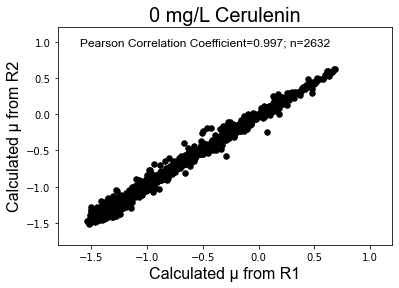

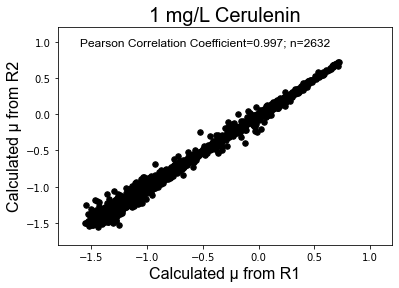

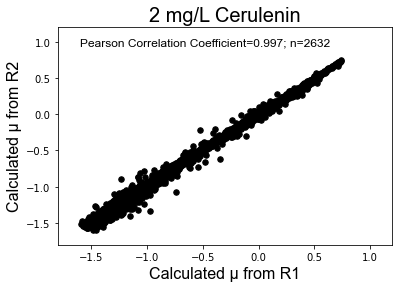

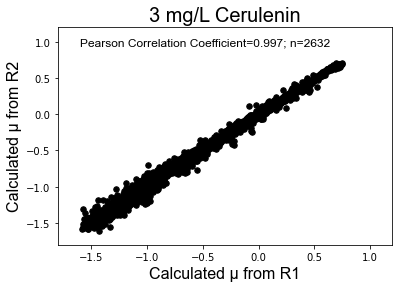

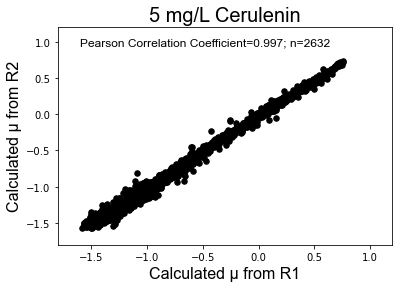

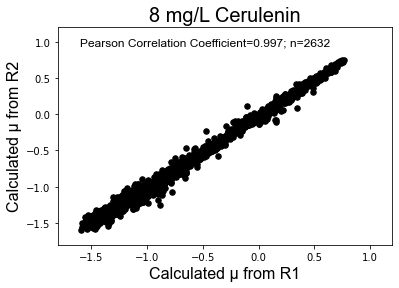

In [18]:
colors = {'Lib_0':'black','Lib_1':'black','Lib_2':'black',\
          'Lib_3':'black','Lib_5':'black','Lib_8':'black'}
for ce in cerulenin:
    plt.scatter(view['miu_Lib_'+str(ce)+'A'],view['miu_Lib_'+str(ce)+'B'],\
            s=30,color=colors['Lib_'+str(ce)])
    plt.text(-1.6,0.95,'Pearson Correlation Coefficient=%s; n=%d'%(("{0:.3f}".\
        format(view.corr()['miu_Lib_'+str(ce)+'A']['miu_Lib_'+str(ce)+'B'])),\
        len(view.dropna())),fontsize=12, fontproperties = 'Arial')
    plt.xlabel('Calculated μ from R1',fontsize = 16, fontproperties = 'Arial')
    plt.ylabel('Calculated μ from R2',fontsize = 16, fontproperties = 'Arial')
    plt.title(str(ce)+' mg/L Cerulenin',fontsize = 20, fontproperties = 'Arial')
    plt.axis([-1.8, 1.2, -1.8, 1.2])
    plt.savefig('ExportResults/Lib%s_corr_250_0508.png'%(ce),dpi = 1000)
    plt.show()

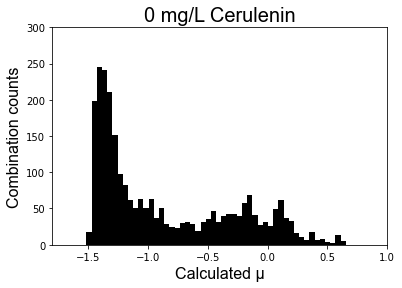

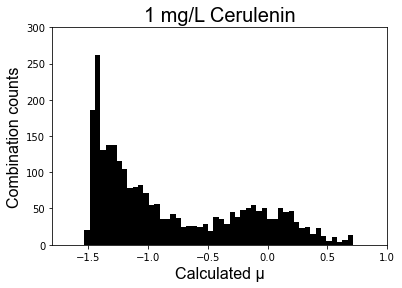

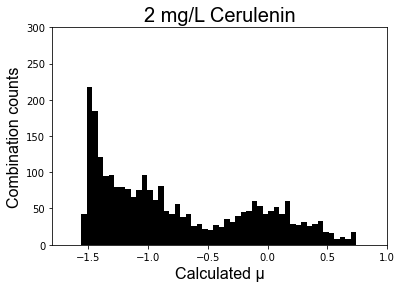

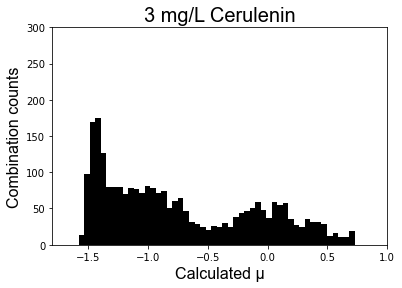

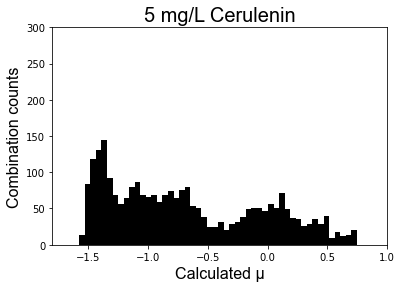

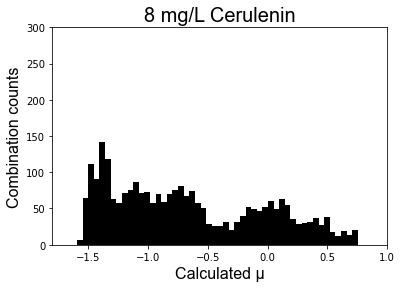

In [19]:
#Plot the miu distribition
_bin_count = 50
for ce in cerulenin:
    plt.hist(view['miu_Lib_'+str(ce)].values, bins = _bin_count,color=colors['Lib_'+str(ce)])
    plt.title(str(ce)+' mg/L Cerulenin',fontsize = 20, fontproperties = 'Arial')
    plt.xlabel('Calculated μ',fontsize = 16,fontproperties = 'Arial')
    plt.ylabel('Combination counts',fontsize = 16,fontproperties = 'Arial')
    plt.axis([-1.8, 1.0, 0, 300])
    plt.savefig('ExportResults/hist_Lib%s_250_0508.png'%(ce), dpi = 1000)
    plt.show()

In [20]:
#Compare the FACS-seq result with individual characterization
con = pd.read_excel('Characterized_results_0708.xlsx')

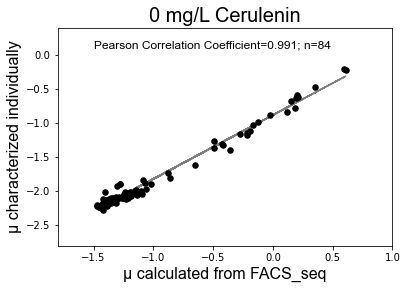

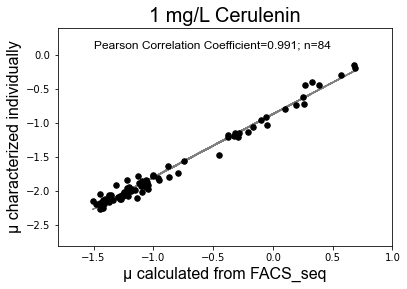

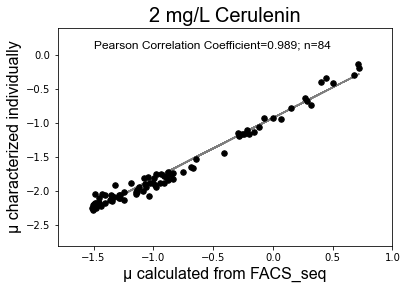

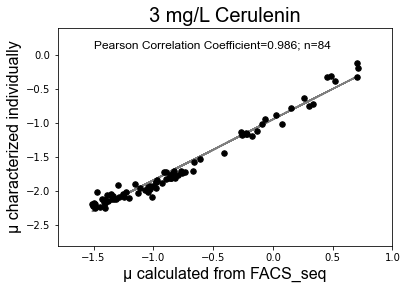

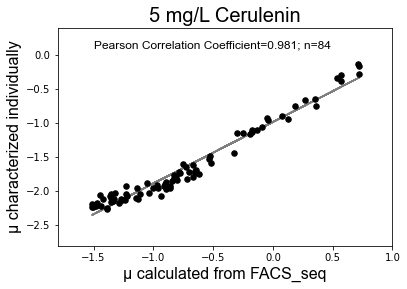

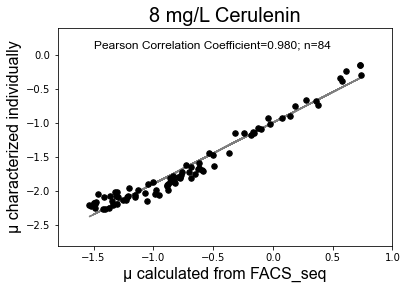

In [21]:
cerulenin = [0,1,2,3,5,8]
for ce in cerulenin:
    x = con['miu_Lib_'+str(ce)]
    y = con['t_miu_Lib'+str(ce)]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"--",color = 'black',alpha = 0.5)
    plt.scatter(x,y,s=30,color=colors['Lib_'+str(ce)])
    plt.text(-1.5,0.1,'Pearson Correlation Coefficient=%s; n=%d'%(("{0:.3f}".\
        format(con.corr()['miu_Lib_'+str(ce)]['t_miu_Lib'+str(ce)])),\
        len(con)),fontsize=12,fontproperties = 'Arial')
    plt.xlabel('μ calculated from FACS_seq',fontsize = 16,fontproperties = 'Arial')
    plt.ylabel('μ characterized individually',fontsize = 16,fontproperties = 'Arial')
    plt.title(str(ce)+' mg/L Cerulenin',fontsize = 20,fontproperties = 'Arial')
    plt.axis([-1.8, 1.0, -2.8, 0.4])
    plt.savefig('ExportResults/Lib'+str(ce)+'0_validation_0708.png',dpi = 1000)
    plt.show()